LAB 1
Importing libraries

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma

Reading CSV

In [2]:
df: pd.DataFrame = pd.read_csv("data.csv", sep=";", names=[i for i in range(10)])
print(df)

        0      1      2      3       4      5      6      7      8      9
0  -4.772 -3.551 -3.498 -3.552  -6.023 -4.315 -2.888 -6.262 -5.569 -5.164
1  -3.396 -0.389 -3.421 -2.493  -4.189 -4.537 -4.557 -4.185 -3.445 -8.546
2  -4.056 -5.355 -1.346  0.635  -4.934 -4.044 -3.669  0.817 -0.636 -2.788
3  -3.200 -2.915 -0.990 -7.943  -5.401 -9.015 -2.823 -0.789 -6.192 -2.745
4  -2.574 -6.034 -5.185 -6.383  -5.883 -3.322 -2.779 -2.376 -7.034 -3.848
5  -4.941 -4.125 -4.109 -3.298  -1.612 -5.391 -0.622 -4.092 -6.054 -4.279
6  -2.812 -7.251 -5.361 -5.462  -3.884 -6.113 -2.173 -2.791 -7.564 -4.829
7  -2.371 -2.310 -0.359 -3.546  -2.657 -4.063 -2.876 -4.228 -0.998 -8.238
8  -2.917 -0.890 -1.665 -4.112  -4.852 -0.121 -3.169 -6.575 -3.896 -3.986
9  -2.453 -5.961 -1.383 -5.573  -3.164 -3.797 -3.142 -1.534 -2.408 -1.947
10 -0.415 -4.667 -4.274 -5.442 -10.269 -6.069 -6.395 -2.339 -2.839 -3.404
11 -4.162 -3.475 -6.423 -1.630   0.896 -4.690 -5.902 -5.283 -5.304 -2.866


In [3]:
array = np.sort(df.to_numpy().reshape(df.shape[0]*df.shape[1]) * -1)

print(array, array.shape, sep="\n")

[-0.896 -0.817 -0.635  0.121  0.359  0.389  0.415  0.622  0.636  0.789
  0.89   0.99   0.998  1.346  1.383  1.534  1.612  1.63   1.665  1.947
  2.173  2.31   2.339  2.371  2.376  2.408  2.453  2.493  2.574  2.657
  2.745  2.779  2.788  2.791  2.812  2.823  2.839  2.866  2.876  2.888
  2.915  2.917  3.142  3.164  3.169  3.2    3.298  3.322  3.396  3.404
  3.421  3.445  3.475  3.498  3.546  3.551  3.552  3.669  3.797  3.848
  3.884  3.896  3.986  4.044  4.056  4.063  4.092  4.109  4.112  4.125
  4.162  4.185  4.189  4.228  4.274  4.279  4.315  4.537  4.557  4.667
  4.69   4.772  4.829  4.852  4.934  4.941  5.164  5.185  5.283  5.304
  5.355  5.361  5.391  5.401  5.442  5.462  5.569  5.573  5.883  5.902
  5.961  6.023  6.034  6.054  6.069  6.113  6.192  6.262  6.383  6.395
  6.423  6.575  7.034  7.251  7.564  7.943  8.238  8.546  9.015 10.269]
(120,)


In [4]:
intervals_count = int(np.log2(array.shape[0])) + 1
print(intervals_count)

7


-0.896 10.269
[np.float64(-0.09849999999999992), np.float64(1.4965000000000004), np.float64(3.0915000000000004), np.float64(4.6865000000000006), np.float64(6.281500000000001), np.float64(7.8765), np.float64(9.471499999999999)] [0.04702194 0.06269592 0.20898642 0.18286311 0.08881923 0.0261233
 0.01044932]


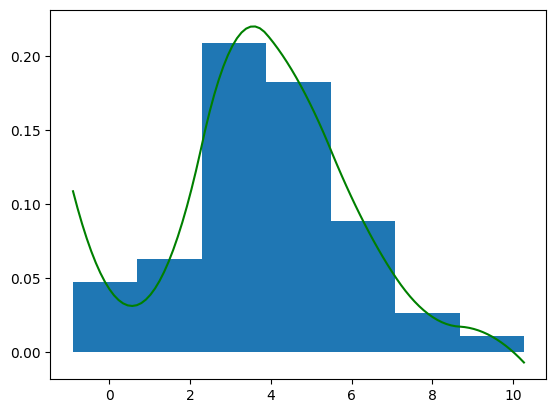

In [5]:
minv = min(array)
maxv = max(array)
print(minv, maxv)

#  n - количество значений в интервале, bars - местоположение столбов
n, bars, patches = plt.hist(array, bins=intervals_count, range=(minv, maxv), density=True)

#  берём среднее от координат левой и правой границ столбца
x = [(bars[i] + bars[i+1])/2 for i in range(len(bars)-1)]
print(x, n)

#  для более похожей интерполяции добавим на границах нулевые элементы 
x.append(10)
n_new = np.append(n, 0)


spl = make_interp_spline(x, n_new, k=2)
x_new = np.linspace(minv, maxv, 100)
y = spl(x_new)
plt.plot(x_new, y, color="green")

Выборочное мат. ожидание и выборочная дисперсия

In [6]:
mx = np.mean(array)
s2 = 1/(array.shape[0] - 1) * (np.sum((array - mx)**2))
mu2 = np.mean(array**2)
print(mx, s2, mu2)

3.8705416666666665 4.338545040266107 19.283483291666666


Допустим данные имеют гамма распределение с параметрами α и λ. Тогда найдём их с помощью ОММ.
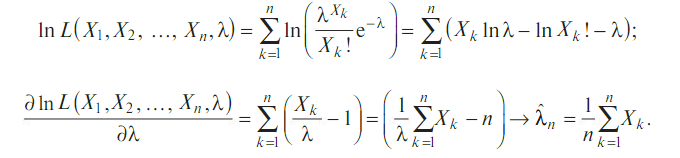

C:\Users\Kuzne\AppData\Local\Temp\ipykernel_5268\586683520.py:6: RuntimeWarning: invalid value encountered in scalar power
  y = [alpha**lmb / gamma(lmb) * (x ** (lmb-1)) * (math.e**(-alpha*x)) for x in x_new]


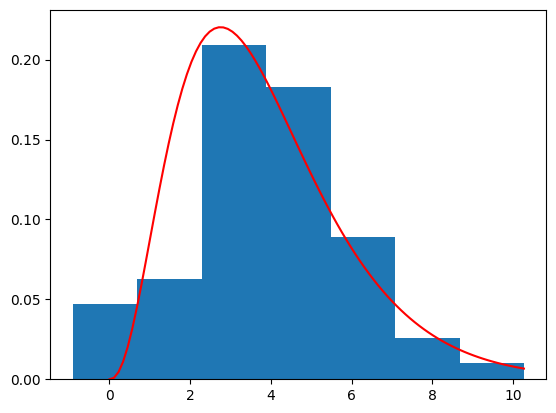

In [7]:
alpha = mx/(mu2 - mx**2)
lmb = mx**2/(mu2 - mx**2)

n, bars, _ = plt.hist(array, bins=intervals_count, range=(minv, maxv), density=True)
x_new = np.linspace(minv, maxv, 100)
y = [alpha**lmb / gamma(lmb) * (x ** (lmb-1)) * (math.e**(-alpha*x)) for x in x_new]
plt.plot(x_new, y, color="red")

xи2 распределение

C:\Users\Kuzne\AppData\Local\Temp\ipykernel_5268\3386792680.py:5: RuntimeWarning: invalid value encountered in scalar power
  y = [(x** (v/2 - 1))/2**(v/2)/gamma(v/2)*(math.e**(-x/2)) for x in x_new]


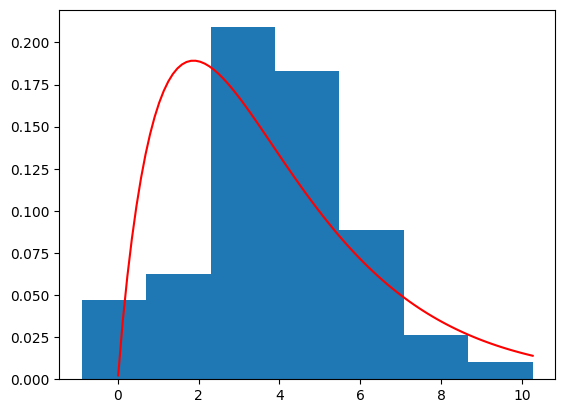

In [8]:
v = mx

n, bars, _ = plt.hist(array, bins=intervals_count, range=(minv, maxv), density=True)
x_new = np.linspace(minv, maxv, 100)
y = [(x** (v/2 - 1))/2**(v/2)/gamma(v/2)*(math.e**(-x/2)) for x in x_new]
plt.plot(x_new, y, color="red")

Нормальное распределение

(-0.896, 10.269)

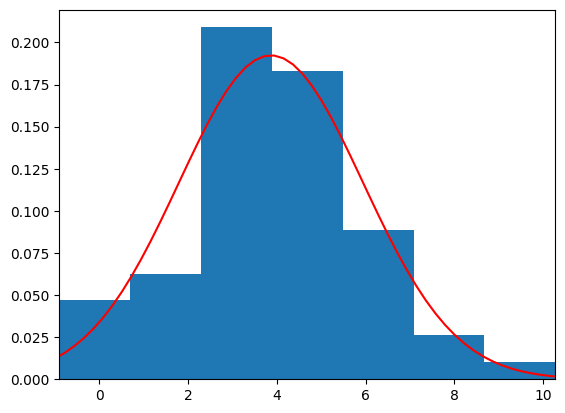

In [9]:
a = mx
sigma = (mu2 - mx**2)**(0.5)

n, bars, _ = plt.hist(array, bins=intervals_count, range=(minv, maxv), density=True)

x_new = np.linspace(-5+minv, maxv+5, 100)
y = [(1/(((2*math.pi)**0.5)*sigma))*(math.e**(-((x-a)**2)/(2*(sigma**2)))) for x in x_new]
plt.plot(x_new, y, color="red")
plt.xlim(minv, maxv)

(-0.896, 10.269)

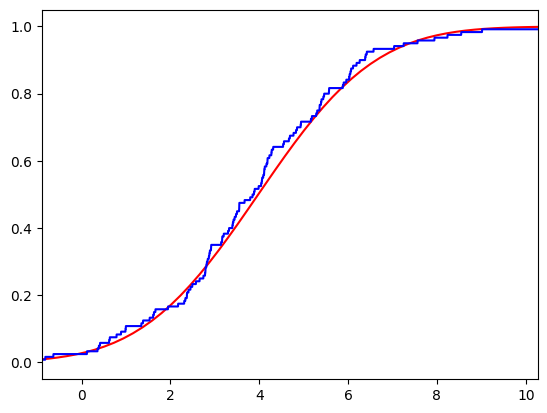

In [17]:
y = y/np.sum(y)
F_true = [np.sum(y[:i]) for i in range(len(y))]
x_distr = np.linspace(minv, maxv, 3000)
F_emp = []
for x in x_distr:
    F_emp.append(len(array[array<x])/len(array))

plt.plot(x_new, F_true, color="red")
x_discr = np.linspace(minv, maxv, len(F_emp))
plt.plot(x_discr, F_emp, color="blue")
plt.xlim(minv, maxv)